# Plot results

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import sys
import gpflow
import gpflow.kernels as k

sys.path.append( './helper/' )
from XperimentPlotter import XperimentPlotter
from Colormap import Colormap
from GPHelper import LinearNoise, ViewpixxAlpha

2024-01-23 23:52:57.142177: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-23 23:52:57.174937: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-23 23:52:57.174994: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-23 23:52:57.176062: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-23 23:52:57.181528: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-23 23:52:57.181959: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
plt.rcParams['text.usetex'] = True
baseFigurePath = './tmp/figures'

## Figure 6.5

In [3]:
data_unser_withoutTemp = []
# read data
path = '../data/027lastExperimentPart1'
data_unser_withoutTemp.append(XperimentPlotter.ReadData(f'{path}/Test01/', '037 Test1 (nm, random)', ['2023-11-19 15:06', '2023-11-19 20:14']))

path_temps = f'{path}/Test01'
data_unser = []
for d in data_unser_withoutTemp:
    data_unser.append(XperimentPlotter.mergeTempsInData(d, path_temps))

XperimentPlotter.ShortStats(data_unser)

/home/jonas/Documents/GithubRepo/code/./helper/Thermometer.py:33: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  traw = pd.read_csv(filename, header=None, sep=' ', skiprows=lambda i: 1 - i % 2, engine='c') # even lines from viewpixx


***************
* STATISTICS: *
***************
Number of datasets: 1
Names of datasets: ['037 Test1 (nm, random)']
Temps merged: True
Number of datapoints (mean): 4,096


 Name: 037 Test1 (nm, random)
 slice: [0.0, 0.93]
 num. training points: 3809
  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -3136.05016510554
        x: [-2.251e+00  3.717e+02  2.497e-01  1.264e-03  1.124e+02
             1.339e+02  1.171e+01  9.997e-01  4.528e+00  1.069e+00
             5.087e+01]
      nit: 78
      jac: [-1.634e+02 -4.383e-01  1.064e+02  4.722e+02 -7.908e-02
             9.895e-03  2.151e-05 -4.546e+03  1.537e-02  4.492e-06
             5.802e-01]
     nfev: 190
     njev: 190
 hess_inv: <11x11 LbfgsInvHessProduct with dtype=float64>


name,class,transform,prior,trainable,shape,dtype,value
GPR.mean_function.gamma,Parameter,Identity,,True,(),float64,50.86926
GPR.mean_function.alpha,Parameter,Identity,,True,(),float64,0.99971
GPR.mean_function.c1,Parameter,Identity,,True,(),float64,4.52828
GPR.mean_function.c2,Parameter,Identity,,True,(),float64,1.06937
GPR.mean_function.A,Parameter,Identity,,True,"(1, 1)",float64,[[112.42374]]
GPR.mean_function.C,Parameter,Identity,,True,"(1, 1)",float64,[[133.93828]]
GPR.mean_function.D,Parameter,Identity,,True,"(1, 1)",float64,[[11.70639]]
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,371.73787
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.10012
GPR.likelihood.scale.A,Parameter,Identity,,True,"(1, 1)",float64,[[0.24974]]


(<tf.Variable 'Variable:0' shape=(1, 1) dtype=float64, numpy=array([[112.42374098]])>, <tf.Variable 'Variable:0' shape=(1, 1) dtype=float64, numpy=array([[133.93828082]])>, <tf.Variable 'Variable:0' shape=(1, 1) dtype=float64, numpy=array([[11.70639363]])>, <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.9997078676586659>, <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=4.528278226660621>, <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0693733754094399>, <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=50.869259001721744>)
prediction by GP (max std: 0.329)


/home/jonas/Documents/GithubRepo/code/./helper/XperimentPlotter.py:326: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


mean of residuen: 2.68e-05
std. of residuen: 0.138


/home/jonas/Documents/GithubRepo/code/./helper/XperimentPlotter.py:361: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


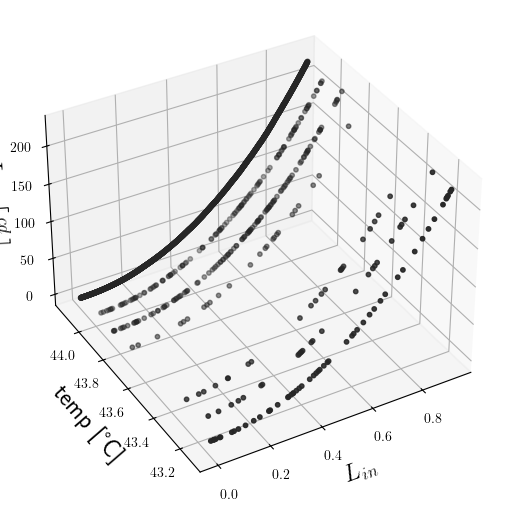

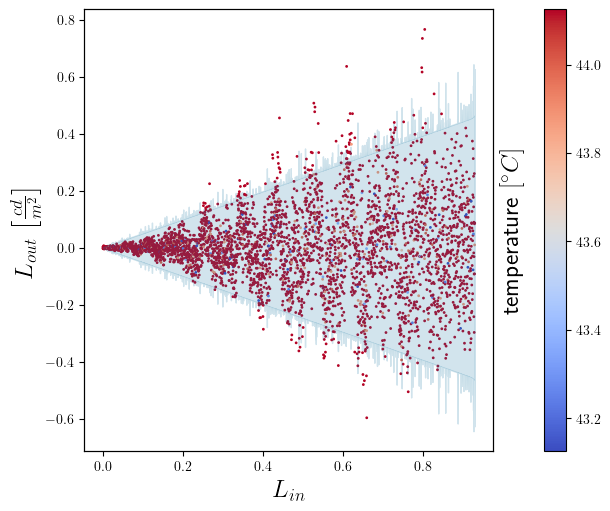

In [4]:
# train
i = 0
base = data_unser[0]
print(f' Name: {base.name}')
basedf = base.dataframe
df = pd.DataFrame()
df['L_in'] = basedf['levels']
df['temps'] = basedf['temps']
df['L_out'] = basedf['mean']

kernel = k.SquaredExponential()
mean_funct = ViewpixxAlpha(gamma=2.2, alpha=0, c1=0.24, c2=1, A=100, C=0, D=12)
likelihood = gpflow.likelihoods.Gaussian(scale=LinearNoise(A=0.1, c=gpflow.Parameter(0, trainable=True)))

model = XperimentPlotter.fitApproach(df, 12000, [0.0, 0.93], kernel=kernel, mean_funct=mean_funct, likelihood=likelihood, iterationlimit=1000, showStd=True, path='05Invertierung/Training')

## Figure 6.6 & 6.7

In [5]:
# VIEWPixx /3D Lite
data_unser_withoutTemp = []

path = '../data/028lastExperimentPart2_b'
data_unser_withoutTemp.append(XperimentPlotter.ReadData(f'{path}/Test01/', '027 Test1 (nm, random, gamma 1.0)', ['2023-11-20 15:05', '2023-11-20 20:12']))

path_temps = f'{path}/Test01'
data_unser = []
for d in data_unser_withoutTemp:
    data_unser.append(XperimentPlotter.mergeTempsInData(d, path_temps))

XperimentPlotter.ShortStats(data_unser)

/home/jonas/Documents/GithubRepo/code/./helper/Thermometer.py:33: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  traw = pd.read_csv(filename, header=None, sep=' ', skiprows=lambda i: 1 - i % 2, engine='c') # even lines from viewpixx


***************
* STATISTICS: *
***************
Number of datasets: 1
Names of datasets: ['027 Test1 (nm, random, gamma 1.0)']
Temps merged: True
Number of datapoints (mean): 4,096


In [6]:
# read lut
df = pd.read_csv('../data/027lastExperimentPart1/LinearisationLUT.csv')

In [7]:
data_linear = data_unser[0].dataframe
data_linear = data_linear.sort_values(by='levels')
df = df.sort_values(by='levels')
min = df['prediciton'].min()
max = df['prediciton'].max()
print(min)
print(max)
print('-------')
min = df['prediciton'].head(3).mean()
max = df['prediciton'].tail(3).mean()
print(min)
print(max)
perfect_linear = np.linspace(min, max, len(data_linear['levels']))

0.733434907756191
332.56295494732694
-------
0.7340546317855162
331.2994521042875


max_y = 309.2551239168306
max_x = 0.67080737313776
max_x2 = 223.0856822111476


/tmp/ipykernel_191387/2547432411.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


mean: 0.31961486448665366
std: 0.3742434526751502
Residuen of measurement and "perfect linear" (44.1°C - 44.1°C (0.0°C))
omega um 0.67 herum: 0.2365182561681562
omega um 0.67 herum: 44
omega um 0.67 herum: 3163    0.819398
2039    0.739906
728     1.032987
1614    0.982966
2745    1.005140
3629    0.933474
2434    0.874897
2468    0.797447
3276    0.760433
1683    1.038504
2270    1.081139
3605    0.981779
3827    0.911268
922     0.734264
2560    0.733918
1855    0.603200
805     0.476480
323     0.404082
1302    0.404750
1716    0.272968
3724    0.277790
1449    0.620709
1448    0.523703
2556    0.482239
3357    0.929715
3049    0.913014
4062    1.003242
2352    1.160270
3715    1.172291
3468    1.056476
1959    0.917898
3209    0.869907
1288    0.807792
1682    0.651714
3191    1.175249
3733    1.069737
2392    1.000632
871     0.795872
2964    0.841413
646     0.616680
2164    0.633828
383     1.039584
2166    0.979418
1517    0.835911
Name: mean, dtype: float64


/tmp/ipykernel_191387/2547432411.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


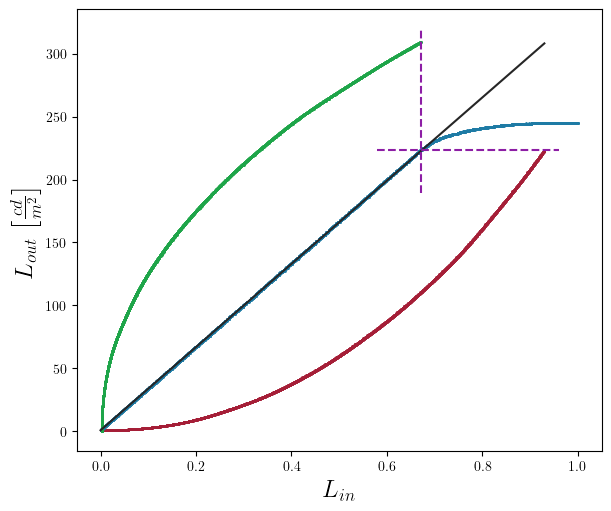

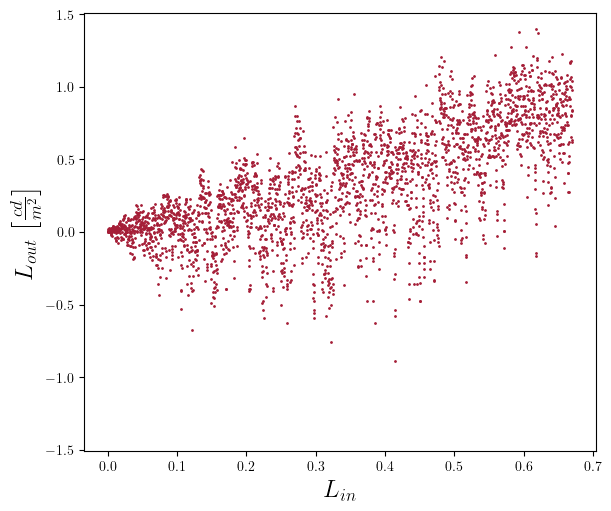

In [8]:
fontsize = 18
path = '05Invertierung/ControllMeasurement'

# Figure 6.7
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,5), layout='constrained')
df_short = df[df['levels'] >= 0.0]
df_short = df_short[df_short['levels'] <= 0.93]
axes.plot(df_short['levels'], perfect_linear[:3809], color=Colormap.black)
axes.scatter(df_short['levels'], df_short['prediciton'], s=1, color=Colormap.red)
axes.scatter(data_linear['levels'], data_linear['mean'], s=1, color=Colormap.blue)
axes.scatter(df_short['prediciton']/df['prediciton'].max(), df_short['levels']*df['prediciton'].max(), s=1, color=Colormap.map[2])
max_y = (df_short['levels']*df['prediciton'].max()).max()
max_x = (df_short['prediciton']/df['prediciton'].max()).max()

max_x2 = df_short['prediciton'].max()

print(f'max_y = {max_y}')
print(f'max_x = {max_x}')
print(f'max_x2 = {max_x2}')


axes.vlines(max_x, ymin=max_y-120, ymax=max_y+10, colors=Colormap.map[3], linestyles='dashed',)
axes.hlines(max_x2, xmin=0.93-0.35, xmax=0.93+0.03, colors=Colormap.map[3], linestyles='dashed',)

axes.set_xlabel(r'$L_{in}$', fontsize=fontsize)
axes.set_ylabel(r'$L_{out}$ $\left[\frac{cd}{m^2}\right]$', fontsize=fontsize)
figurePath = f'{baseFigurePath}/{path}_A.png'
fig.show()
fig.savefig(figurePath, dpi=300)

# Figure 6.6
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,5), layout='constrained')
axes.scatter(data_linear[data_linear['levels'] <= max_x]['levels'], data_linear[data_linear['levels'] <= max_x]['mean']-perfect_linear[:2747], s=1, c=Colormap.red)
print(f'mean: {(data_linear[data_linear["levels"] <= max_x]["mean"]-perfect_linear[:2747]).mean()}\nstd: {(data_linear[data_linear["levels"] <= max_x]["mean"]-perfect_linear[:2747]).std()}')

axes.set_xlabel(r'$L_{in}$', fontsize=fontsize)
axes.set_ylabel(r'$L_{out}$ $\left[\frac{cd}{m^2}\right]$', fontsize=fontsize)
print(f'Residuen of measurement and "perfect linear" ({data_linear["temps"].max():.3}°C - {data_linear["temps"].min():.3}°C ({data_linear["temps"].max() -data_linear["temps"].min():.3}°C))')
max_monitor = -65
print(f'omega um 0.67 herum: {(data_linear[data_linear["levels"] <= max_x]["mean"]-perfect_linear[:2747])[(data_linear["levels"] >= 0.66) & (data_linear["levels"] <= 0.68)].std()}')
print(f'omega um 0.67 herum: {len((data_linear[data_linear["levels"] <= max_x]["mean"]-perfect_linear[:2747])[(data_linear["levels"] >= 0.66) & (data_linear["levels"] <= 0.68)])}')
print(f'omega um 0.67 herum: {(data_linear[data_linear["levels"] <= max_x]["mean"]-perfect_linear[:2747])[(data_linear["levels"] >= 0.66) & (data_linear["levels"] <= 0.68)]}')

axes.set_ylim(-1.51, 1.51)


figurePath = f'{baseFigurePath}/{path}_B.png'
fig.show()
fig.savefig(figurePath, dpi=300)